<a href="https://colab.research.google.com/github/LukaszLukaszP/Netflix-Data-Analysis/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project focuses on analyzing data related to the content available on the **Netflix** platform. The analysis aims to explore the dataset to identify trends in types of productions, countries of origin, genre popularity, and relationships between creators and actors.

The dataset, published on Kaggle, contains detailed information about titles available on Netflix, including the following columns:
- **`type`** – indicating whether the content is a movie or a TV show,
- **`director`**, **`cast`** – details about creators and cast members,
- **`country`** – production countries,
- **`release_year`**, **`date_added`** – release year and the date added to the platform,
- as well as **`rating`** and **`duration`** – age ratings and duration.

The main questions addressed in this analysis are:
1. What is the distribution of content types on the platform?
2. Which countries dominate in content production?
3. Which directors and actors appear most frequently in Netflix productions?
4. What are the most popular genres and their co-occurrence patterns?
5. How does the release year compare to the date the content was added to the platform?

The goal of this analysis is to uncover key trends within the dataset and prepare visualizations and insights that could serve as a foundation for further research into the Netflix streaming platform.


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import os

os.listdir('/content/drive/My Drive/Analiza danych/Kaggle')

['netflix_titles.csv',
 'Arkusz kalkulacyjny bez tytułu.gsheet',
 'netflix.ipynb']

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go

In [112]:
df = pd.read_csv('/content/drive/My Drive/Analiza danych/Kaggle/netflix_titles.csv')

# Data Preparation

The dataset used for this analysis contains information about Netflix titles, including metadata such as title, director, cast, production country, release year, and more. The original dataset consists of **8807 rows** and **12 columns**. During the preparation phase, several steps were taken to ensure the data was clean and ready for analysis:

### 1. Handling Missing Values
Some columns, such as **`director`**, **`cast`**, **`country`**, **`date_added`**, **`rating`**, and **`duration`**, contain missing values. These were addressed as follows:
- For exploratory analysis, records with missing critical fields (e.g., `country` or `release_year`) were either excluded or their absence was noted during specific analyses.
- Missing values in non-critical columns were handled on a case-by-case basis to avoid skewing results.

### 2. Splitting Multi-Country Productions
The **`country`** column often includes multiple countries for a single title. To analyze content by production country more effectively, we applied a transformation:
- Titles with multiple production countries were "exploded" into separate rows, with each country represented individually.
- This ensured that each country was properly counted in analyses, avoiding underrepresentation of co-productions.

### 3. Initial Observations
- Content is divided into two main types: **Movies** and **TV Shows**. Movies make up the majority of the dataset, accounting for approximately **69.6%** of all titles.
- Preliminary cleaning ensured that the dataset was free of duplicates and ready for further exploration.

These preparation steps provided a clean and structured dataset, allowing for meaningful analyses and insights into the trends within Netflix content.


In [113]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [114]:
df.shape

(8807, 12)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [116]:
#Function to split values from a column
def split_and_explode(df, columns):
    for col in columns:
        df[col] = df[col].str.split(',')
    return df.explode(columns).reset_index(drop=True)

### Average Runtime of Movies on Netflix

Movies on Netflix have an average runtime of approximately **100 minutes**, reflecting the platform's preference for feature-length content. This aligns with traditional film standards while ensuring that titles remain accessible to a broad audience.


In [117]:
df_duration = df[df['type'] == 'Movie'][['duration']].copy()
print(type(df_duration))

<class 'pandas.core.frame.DataFrame'>


In [118]:
df_duration.dropna(inplace=True)

df_duration['duration'] = df_duration['duration'].astype(str).apply(lambda x: int(re.findall(r'\d+', x)[0]))
print('mean:',  df_duration.mean())
print('median:', df_duration.median())
print('median:', df_duration.max())
print('median:', df_duration.min())

mean: duration    99.577187
dtype: float64
median: duration    98.0
dtype: float64
median: duration    312
dtype: int64
median: duration    3
dtype: int64


# Distribution of Content Types on Netflix

One of the key aspects of Netflix's content library is the distinction between two primary content types: **Movies** and **TV Shows**. Understanding the distribution of these types provides insight into the platform's focus and content strategy.

### Analysis

Using the dataset, we calculated the proportions of each content type. The analysis shows that:
- **Movies** dominate the platform, making up approximately **69.6%** of all titles.
- **TV Shows** account for the remaining **30.4%**.

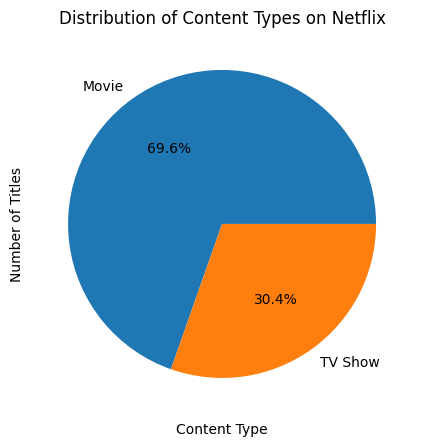

In [119]:
content_type_counts = df['type'].value_counts()
content_type_counts.plot(kind='pie', figsize=(8, 5), color=['blue', 'orange'], autopct='%1.1f%%')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()

In [120]:
df_countries = split_and_explode(df, ['country'])
df_countries["country"] = df_countries["country"].str.strip()
df_countries['country'].isna().sum()

831

In [121]:
df_countries.dropna(subset=['country'], inplace=True)

In [122]:
type_counts_by_country = df_countries.groupby(['country', 'type']).size().unstack(fill_value=0)

type_counts_by_country.columns = ['Movies', 'TV Shows']

type_counts_by_country = type_counts_by_country.reset_index()

In [123]:
type_counts_by_country = df_countries.groupby(['country', 'type']).size().unstack(fill_value=0)

type_counts_by_country.columns = ['Movies', 'TV Shows']

type_counts_by_country = type_counts_by_country.reset_index()

type_counts_by_country['Total'] = type_counts_by_country['Movies'] + type_counts_by_country['TV Shows']

type_counts_by_country_sorted = type_counts_by_country.sort_values(by='Total', ascending=False).reset_index(drop=True)

type_counts_by_country_sorted.head()

,country,Movies,TV Shows,Total
0,United States,2752,938,3690
1,India,962,84,1046
2,United Kingdom,534,272,806
3,Canada,319,126,445
4,France,303,90,393


In [124]:
type_counts_by_country_sorted[type_counts_by_country_sorted['TV Shows'] > type_counts_by_country_sorted['Movies']].head()

,country,Movies,TV Shows,Total
5,Japan,119,199,318
7,South Korea,61,170,231
21,Taiwan,19,70,89
25,Colombia,20,32,52
31,Singapore,18,23,41


In [125]:
top_countries = type_counts_by_country_sorted.head(10)

In [126]:
", ".join(top_countries['country'].astype(str).tolist())

'United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany, Mexico'

In [127]:
poland = type_counts_by_country_sorted[type_counts_by_country_sorted['country'] == 'Poland']
selected_countries = pd.concat([top_countries, poland])
selected_countries

,country,Movies,TV Shows,Total
0,United States,2752,938,3690
1,India,962,84,1046
2,United Kingdom,534,272,806
3,Canada,319,126,445
4,France,303,90,393
5,Japan,119,199,318
6,Spain,171,61,232
7,South Korea,61,170,231
8,Germany,182,44,226
9,Mexico,111,58,169


In [128]:
selected_countries['Movies %'] = (selected_countries['Movies'] / selected_countries['Total']) * 100
selected_countries['TV Shows %'] = (selected_countries['TV Shows'] / selected_countries['Total']) * 100

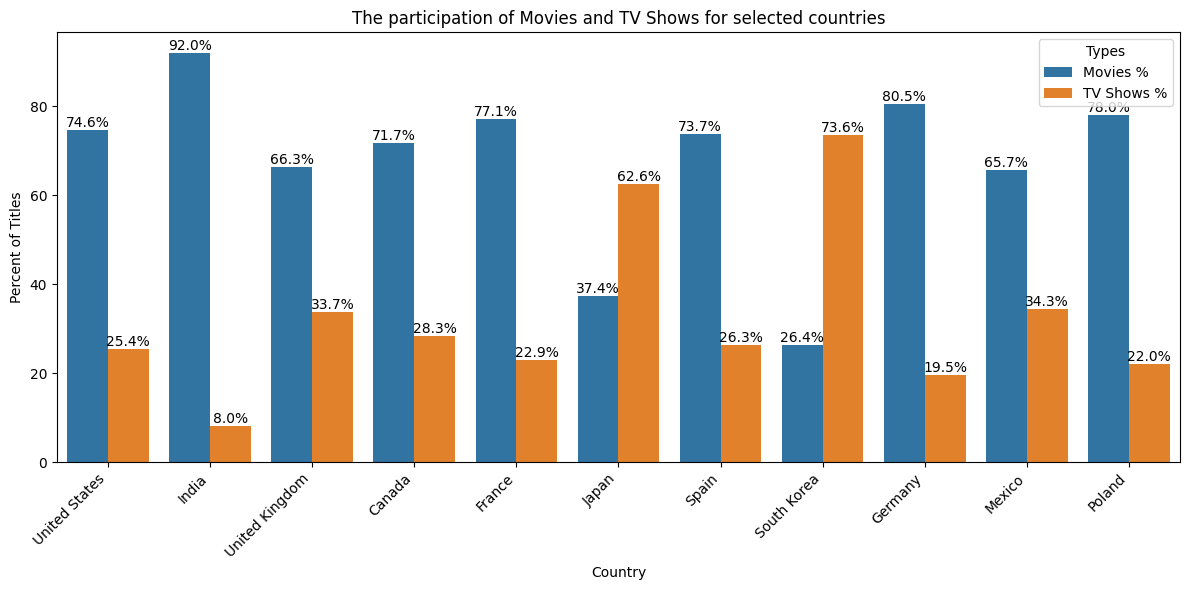

In [129]:
melted_df = pd.melt(selected_countries, id_vars='country', value_vars=['Movies %', 'TV Shows %'], var_name='Content Type', value_name='Percentage')

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='country', y='Percentage', hue='Content Type', data=melted_df)

for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
      bars.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.title('The participation of Movies and TV Shows for selected countries')
plt.xlabel('Country')
plt.ylabel('Percent of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Types')
plt.tight_layout()
plt.show()

In [130]:
countries = melted_df['country'].unique()
fig = go.Figure()

for country in countries:
    country_data = melted_df[melted_df['country'] == country]
    fig.add_trace(go.Pie(
        labels=country_data['Content Type'],
        values=country_data['Percentage'],
        name=country
    ))

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=[
                dict(label=country,
                     method="update",
                     args=[{"visible": [i == j for i in range(len(countries))]},
                           {"title": f"Percentage Share of Movies vs TV Shows in {country}"}])
                for j, country in enumerate(countries)
            ]
        )
    ]
)

fig.update_traces(visible=False)
fig.data[0].visible = True

fig.update_layout(
    title="Percentage Share of Movies vs TV Shows",
    showlegend=True,
    width=800,
    height=500
)

fig.show()

### Distribution of Content Types by Country

In addition to understanding the overall distribution of Movies and TV Shows on Netflix, it is valuable to analyze how this distribution varies across different production countries.

#### Top 10 Countries Producing Content for Netflix
The dataset reveals that the majority of Netflix content originates from a few key countries. The top 10 countries by total content production are:
1. United States
2. India
3. United Kingdom
4. Canada
5. France
6. Japan
7. South Korea
8. Germany
9. Mexico
10. Spain

#### Countries with More TV Shows than Movies
Interestingly, there are some countries where TV Shows dominate over Movies. These include:
- **Japan**
- **South Korea**
- **Taiwan**
- **Colombia**
- **Singapore**

This observation suggests that in several highly developed Asian countries, there is a greater emphasis on producing TV Shows, possibly due to cultural preferences and the focus on local markets.


# Popularity of Actors and Directors on Netflix

Netflix's vast library of content is brought to life by a diverse range of creative talents, including directors and actors who shape the platform's offerings. Understanding which individuals are most frequently featured can provide insights into:
- **Content Trends**: The types of productions Netflix prioritizes (e.g., animation, drama, comedy).
- **Regional Strategies**: How Netflix collaborates with creators to appeal to local and global audiences.
- **Key Collaborations**: Recurring partnerships between directors and actors that drive Netflix’s content strategy.

In this section, we will analyze:
1. The **most frequently featured directors** and their contributions to Netflix’s catalog.
2. The **most frequently featured actors**, reflecting Netflix’s regional and global focus.
3. **Key director-actor collaborations** that highlight the platform's creative partnerships.

By identifying these patterns, we can better understand Netflix's approach to content creation and regional market strategies.


In [131]:
df_exploded_directors = split_and_explode(df, ['director'])
top_directors = df_exploded_directors['director'].value_counts().reset_index().head(10)
top_directors

,director,count
0,Rajiv Chilaka,22
1,Raúl Campos,18
2,Jan Suter,18
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


In [132]:
", ".join(top_directors['director'].astype(str).tolist())

'Rajiv Chilaka, Raúl Campos,  Jan Suter, Marcus Raboy, Suhas Kadav, Jay Karas, Cathy Garcia-Molina, Martin Scorsese, Jay Chapman, Youssef Chahine'

In [133]:
df_exploded_directors['country'] = df_exploded_directors['country'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_exploded_directors["country"] = df_exploded_directors["country"].str.strip()

In [134]:
usa_directors = df_exploded_directors[df_exploded_directors['country'].str.contains('United States', na=False)]

top_usa_directors = (
    usa_directors['director']
    .value_counts()
    .reset_index()
    .head(10)
)

top_usa_directors

,director,count
0,Jay Karas,15
1,Marcus Raboy,15
2,Martin Scorsese,12
3,Jay Chapman,12
4,Steven Spielberg,11
5,Don Michael Paul,10
6,Shannon Hartman,9
7,Troy Miller,8
8,Ryan Polito,8
9,Robert Rodriguez,8


In [135]:
", ".join(top_usa_directors['director'].astype(str).tolist())

'Jay Karas, Marcus Raboy, Martin Scorsese, Jay Chapman, Steven Spielberg, Don Michael Paul, Shannon Hartman, Troy Miller, Ryan Polito, Robert Rodriguez'

In [136]:
df_director_actors = split_and_explode(df_exploded_directors, ['cast'])
df_director_actors.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [137]:
top_actors = df_director_actors['cast'].value_counts().reset_index().head(10)
top_actors

,cast,count
0,Anupam Kher,39
1,Rupa Bhimani,37
2,Takahiro Sakurai,34
3,Julie Tejwani,30
4,Andrea Libman,29
5,Rajesh Kava,29
6,Yuki Kaji,29
7,Alfred Molina,28
8,Om Puri,28
9,Radhika Apte,28


In [138]:
", ".join(top_actors['cast'].astype(str).tolist())

' Anupam Kher,  Rupa Bhimani,  Takahiro Sakurai,  Julie Tejwani,  Andrea Libman,  Rajesh Kava,  Yuki Kaji,  Alfred Molina,  Om Puri,  Radhika Apte'

In [139]:
df_director_actors = df_director_actors.dropna(subset=['director','cast'])
df_director_actors.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
20,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
21,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
22,s3,TV Show,Ganglands,Julien Leclercq,Samuel Jouy,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
23,s3,TV Show,Ganglands,Julien Leclercq,Nabiha Akkari,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
24,s3,TV Show,Ganglands,Julien Leclercq,Sofia Lesaffre,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [140]:
df_director_actors_pair_counts = df_director_actors.groupby(['director', 'cast']).size().reset_index(name='count')
df_director_actors_pair_counts = df_director_actors_pair_counts.sort_values(by='count', ascending=False)
df_director_actors_pair_counts.head(15)

,director,cast,count
37093,Rajiv Chilaka,Rajesh Kava,19
37089,Rajiv Chilaka,Julie Tejwani,19
37094,Rajiv Chilaka,Rupa Bhimani,18
37088,Rajiv Chilaka,Jigna Bhardwaj,18
37104,Rajiv Chilaka,Vatsal Dubey,16
37091,Rajiv Chilaka,Mousam,13
37098,Rajiv Chilaka,Swapnil,13
44097,Suhas Kadav,Saurav Chakraborty,8
40135,S.S. Rajamouli,Sathyaraj,7
46040,Toshiya Shinohara,Kumiko Watanabe,7


In [141]:
"; ".join(df_director_actors_pair_counts.apply(lambda row: f"{row['director']} - {row['cast']}", axis=1))

'Rajiv Chilaka -  Rajesh Kava; Rajiv Chilaka -  Julie Tejwani; Rajiv Chilaka -  Rupa Bhimani; Rajiv Chilaka -  Jigna Bhardwaj; Rajiv Chilaka - Vatsal Dubey; Rajiv Chilaka -  Mousam; Rajiv Chilaka -  Swapnil; Suhas Kadav - Saurav Chakraborty; S.S. Rajamouli -  Sathyaraj; Toshiya Shinohara -  Kumiko Watanabe; S.S. Rajamouli -  Rana Daggubati; S.S. Rajamouli -  Ramya Krishnan; Toshiya Shinohara -  Houko Kuwashima; S.S. Rajamouli -  Tamannaah Bhatia; Toshiya Shinohara - Kappei Yamaguchi; Toshiya Shinohara -  Koji Tsujitani; S.S. Rajamouli - Prabhas; Toshiya Shinohara -  Satsuki Yukino; S.S. Rajamouli -  Nassar; S.S. Rajamouli -  Anushka Shetty; David Dhawan -  Anupam Kher; Cathy Garcia-Molina -  Joross Gamboa; Yılmaz Erdoğan - Yılmaz Erdoğan; Sooraj R. Barjatya -  Alok Nath; Hakan Algül -  Salih Kalyon;  John Paul Tremblay -  Pat Roach;  Robb Wells - Mike Smith; Omoni Oboli - Omoni Oboli; Joey So - Joseph May;  John Paul Tremblay -  Robb Wells; Khaled Marei - Ahmed Helmy; Thierry Donard - 

In [142]:
df_exploded_directors['country'] = df_exploded_directors['country'].astype(str)
df_exploded_directors[df_exploded_directors['director'] == 'Rajiv Chilaka']['country'].str.split(',').explode().str.strip().value_counts()

,count
country,
nan,17
India,5


In [143]:
from collections import Counter
from itertools import combinations

top_director = top_directors.iloc[0, 0]

df_top_director = df_director_actors[df_director_actors['director'] == top_director]

actor_groups = df_top_director.groupby('show_id')['cast'].apply(list)

actor_groups = actor_groups.apply(lambda x: list(set(x)))

actor_pairs = Counter()
for actors in actor_groups:
    if len(actors) > 1:
        pairs = combinations(sorted(actors), 2)
        actor_pairs.update(pairs)

actor_pairs_df = pd.DataFrame(actor_pairs.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)


actor_pairs_df.head(10)


,Pair,Count
31,"( Julie Tejwani, Rajesh Kava)",19
28,"( Jigna Bhardwaj, Rajesh Kava)",18
48,"( Rajesh Kava, Rupa Bhimani)",18
26,"( Jigna Bhardwaj, Julie Tejwani)",18
41,"( Julie Tejwani, Rupa Bhimani)",18
37,"( Jigna Bhardwaj, Rupa Bhimani)",17
39,"( Jigna Bhardwaj, Vatsal Dubey)",16
43,"( Julie Tejwani, Vatsal Dubey)",16
52,"( Rupa Bhimani, Vatsal Dubey)",16
50,"( Rajesh Kava, Vatsal Dubey)",16


# Popularity of Actors and Directors on Netflix

Analyzing the frequency of appearances by actors and directors on Netflix provides insights into the platform's content strategy and recurring creative collaborators. This analysis identifies the most frequently featured individuals and their contributions to Netflix's catalog.

### Most Frequently Featured Directors
The dataset reveals that the following directors have the highest number of productions available on Netflix:
1. **Rajiv Chilaka** – Known for numerous animated productions targeted at younger audiences.
2. **Raúl Campos** and **Jan Suter** – Frequently collaborate on documentaries and stand-up comedy specials.
3. **Marcus Raboy** – Popular for directing comedy shows and specials.

The top directors in the United States include:
- **Jay Karas**
- **Marcus Raboy**
- **Martin Scorsese**
- **Jay Chapman**
- **Steven Spielberg**

These directors collectively represent a wide variety of genres, from comedy to documentaries and high-budget films.

### Most Frequently Featured Actors
The most prominent actors appearing in Netflix productions are:
1. **Anupam Kher** – A highly celebrated Indian actor featured in many Bollywood productions available on Netflix.
2. **Rupa Bhimani** – Known for her contributions to voice acting in animated series.
3. **Takahiro Sakurai** – Frequently seen in Japanese productions, particularly anime.
4. **Julie Tejwani** and **Andrea Libman** – Prominent figures in animated series.

The frequent presence of these actors reflects Netflix's focus on diversifying its content and catering to a global audience.

### Key Collaborations: Director-Actor Pairs
Some director-actor pairs stand out for their repeated collaborations:
- **Rajiv Chilaka** and **Rajesh Kava**
- **Rajiv Chilaka** and **Julie Tejwani**

These collaborations suggest a significant focus on animated productions, particularly for younger viewers.

# Comparison of Production Year and Date Added to Netflix

Understanding the relationship between the production year of content and the date it was added to Netflix provides insights into:
- **Content Freshness**: How quickly Netflix adds new productions to its catalog.
- **Library Strategy**: The balance between newly released content and older titles available on the platform.

### Analysis

The dataset allows us to explore the time difference between when a title was produced and when it was added to Netflix. Specifically, we analyzed:
1. The distribution of content based on the difference between the **production year** and the **date added**.
2. Trends in how Netflix has expanded its library over time, focusing on:
   - Titles added in the same year they were produced.
   - Titles added several years after their release.

### Key Observations

1. **Immediate Availability**: A significant portion of titles (particularly Netflix Originals) are added to the platform in the same year as their production, highlighting Netflix’s focus on fresh and original content.
2. **Older Titles**: Many older titles are also added, enriching the platform’s library with classic and diverse options for viewers.
3. **Yearly Trends**: An upward trend is visible in the number of titles added over recent years, reflecting Netflix’s rapid content expansion.


In [145]:
df_release_add = df[['release_year', 'date_added']].copy()

df_release_add.dropna(inplace=True)
df_release_add.head()

,release_year,date_added
0,2020,"September 25, 2021"
1,2021,"September 24, 2021"
2,2021,"September 24, 2021"
3,2021,"September 24, 2021"
4,2021,"September 24, 2021"


In [146]:
df_release_add['year_added'] = df_release_add['date_added'].str[-4:].astype('int64')
df_release_add.drop('date_added', axis=1, inplace=True)
df_release_add['release_add_diff'] = df_release_add['year_added'] - df_release_add['release_year']
df_release_add.head()

,release_year,year_added,release_add_diff
0,2020,2021,1
1,2021,2021,0
2,2021,2021,0
3,2021,2021,0
4,2021,2021,0


In [147]:
same_year_added_released = (df_release_add['release_year'] == df_release_add['year_added']).sum()
same_year_added_released

3241

In [148]:
df_release_add_diff = df_release_add['release_add_diff'].value_counts().reset_index()
df_release_add_diff[df_release_add_diff['count'] > 100]['count'].sum()

7713

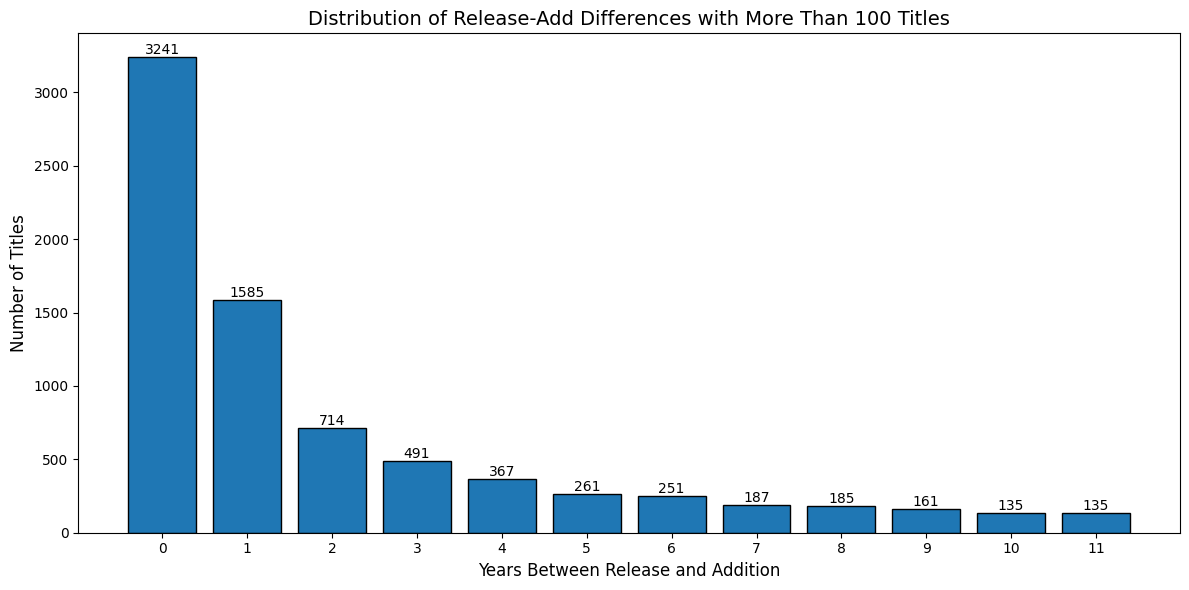

In [149]:
filtered_data = df_release_add_diff[df_release_add_diff['count'] > 100]

plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_data['release_add_diff'], filtered_data['count'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

x_ticks = np.arange(filtered_data['release_add_diff'].min(), filtered_data['release_add_diff'].max() + 1)
plt.xticks(x_ticks, fontsize=10, rotation=0)
plt.title('Distribution of Release-Add Differences with More Than 100 Titles', fontsize=14)
plt.xlabel('Years Between Release and Addition', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.tight_layout()
plt.show()

### Observations

#### Titles Added the Same Year as Production
- Many titles are added to Netflix in the same year as their production, particularly Netflix Originals.
- This highlights the platform’s commitment to providing fresh and relevant content to its viewers.

#### Older Titles
- A substantial presence of titles added several years after their release can also be observed, especially older films and TV shows.
- This strategy ensures a well-rounded library catering to both nostalgic and contemporary preferences.

#### Growth in Content Addition
- Over the past decade, there has been a sharp increase in the number of titles added to Netflix.
- This reflects the platform’s aggressive strategy for content acquisition and original production.

### Insights

The comparison of production year and date added showcases Netflix's dual focus:
1. **Freshness**: By adding many titles immediately after production, Netflix stays relevant and competitive in the streaming market.
2. **Diversity**: By including older titles, Netflix appeals to a broader audience with varied tastes.


# Distribution of Content Ratings on Netflix

Content ratings provide valuable insights into the target audience and content strategy of a platform like Netflix. By analyzing the distribution of ratings, we can understand:
- Which ratings dominate Netflix's library.
- How Netflix caters to different age groups and viewing preferences.

### Analysis

The dataset contains a column, **`rating`**, which specifies the content rating for each title. Ratings indicate whether a title is suitable for children, teens, or adults, such as:
- **TV-MA**: Mature Audience (18+)
- **TV-14**: Teens 14 and older
- **TV-PG**: Parental Guidance suggested
- **G**: General Audience

We analyzed the distribution of ratings to identify the most prevalent categories and their implications.

### Key Observations

1. **Dominance of Mature Content**:
   - The most common rating on Netflix is **TV-MA**, highlighting the platform’s focus on content for adults.
   - Other popular ratings include **TV-14**, **TV-PG**, and **R**, indicating Netflix also appeals to teens and families.

2. **Wide Audience Reach**:
   - Although mature content dominates, a variety of ratings ensures that Netflix offers content for all age groups.

3. **Regional Differences**:
   - Some ratings (e.g., NR or Not Rated) might reflect regional content that does not adhere to global rating standards.

In [151]:
df['rating'].value_counts().reset_index()

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


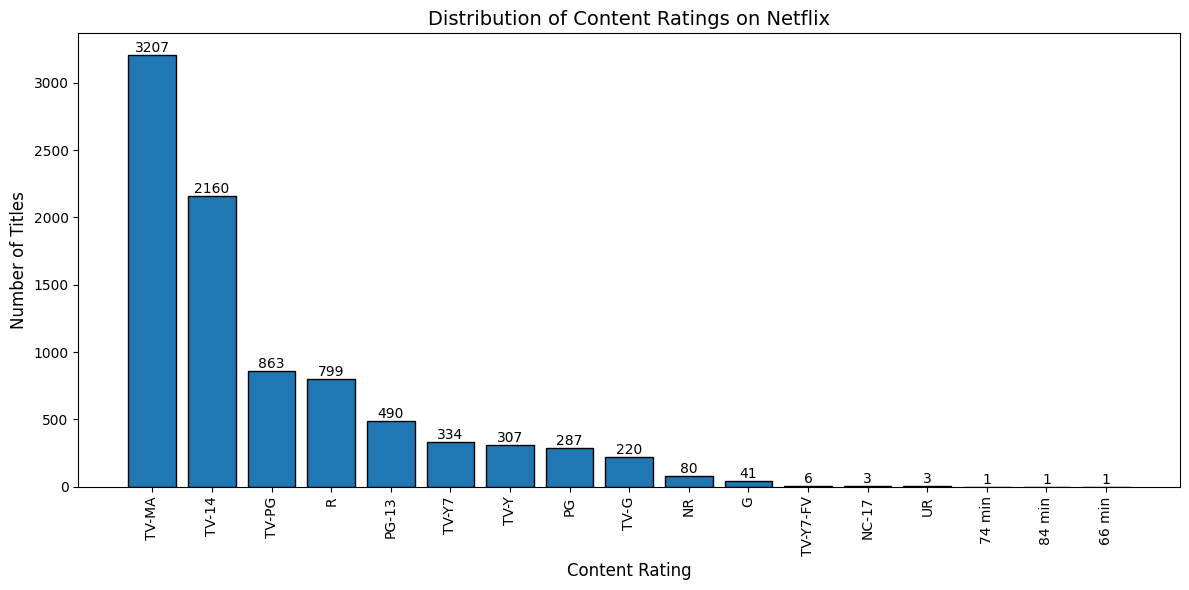

In [152]:
rating_data = df['rating'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(rating_data['rating'], rating_data['count'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.xticks(ticks=range(len(rating_data)), labels=rating_data['rating'], fontsize=10, rotation=90)

plt.title('Distribution of Content Ratings on Netflix', fontsize=14)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.tight_layout()
plt.show()

### Observations

#### Overall Distribution:
- **TV-MA** leads the ratings, making up a significant portion of Netflix’s catalog.
- **TV-14** and **TV-PG** follow, showing that Netflix appeals to a wide audience but primarily targets mature viewers.

#### Ratings by Type:
- **Movies** tend to have a broader range of ratings, including **R** and **PG-13**, reflecting traditional film ratings.
- **TV Shows** are dominated by **TV-MA** and **TV-14**, highlighting a focus on episodic content for adults and teens.

### Insights

- Netflix's catalog primarily targets mature audiences, as shown by the dominance of **TV-MA**.
- However, the platform maintains a diverse library, ensuring that viewers of all age groups can find suitable content.
- Regional content ratings, such as **NR** (Not Rated), could benefit from further exploration to understand their implications for global markets.


# Popularity of Genres on Netflix

Genres play a crucial role in defining the variety and appeal of Netflix’s content library. Analyzing genre popularity provides insights into:
- **Content Trends**: The types of content that dominate the platform.
- **Viewer Preferences**: What audiences around the globe prefer to watch.
- **Strategic Focus**: How Netflix balances mainstream and niche genres.

### Analysis

The dataset reveals that each title on Netflix can be associated with multiple genres, listed in the **`listed_in`** column. To understand genre popularity, we performed the following steps:
1. Split the genres into individual labels for each title.
2. Count the occurrences of each genre.
3. Identify the most common genre combinations.

### Key Observations

1. **Top Genres**:
   - The most frequently occurring genres on Netflix are:
     - **International Movies**
     - **Dramas**
     - **Comedies**
     - **International TV Shows**
     - **Documentaries**

2. **Genre Combinations**:
   - Certain genres frequently co-occur, such as **Dramas** and **Romantic Movies**, indicating thematic overlaps.

3. **Target Audience**:
   - Netflix caters to diverse preferences, with genres ranging from family-friendly content to thrillers and documentaries.

In [153]:
df_exploded_genres = df.copy()
df_exploded_genres['listed_in'] = df_exploded_genres['listed_in'].str.split(', ').apply(lambda x: [genre.strip() for genre in x])
df_exploded_genres = df_exploded_genres.explode('listed_in')

In [154]:
genre_counts = df_exploded_genres['listed_in'].value_counts().reset_index()
top_15_genres = genre_counts.head(15)

In [155]:
", ".join(top_15_genres['listed_in'].astype(str).tolist())

"International Movies, Dramas, Comedies, International TV Shows, Documentaries, Action & Adventure, TV Dramas, Independent Movies, Children & Family Movies, Romantic Movies, TV Comedies, Thrillers, Crime TV Shows, Kids' TV, Docuseries"

In [156]:
grouped_genres = df_exploded_genres.groupby('show_id')['listed_in'].apply(list)

genre_combinations = Counter()
for genres in grouped_genres:
    if len(genres) > 1:
        genre_combinations.update(combinations(sorted(genres), 2))

genre_combinations_df = pd.DataFrame(genre_combinations.items(), columns=['Genre Pair', 'Count']).sort_values(by='Count', ascending=False)

print(genre_combinations_df.head(10))

                                     Genre Pair  Count
2                (Dramas, International Movies)   1483
6              (Comedies, International Movies)    804
19                 (Dramas, Independent Movies)    588
8           (International TV Shows, TV Dramas)    514
0                            (Comedies, Dramas)    502
5    (Action & Adventure, International Movies)    398
29      (International Movies, Romantic Movies)    372
33  (International TV Shows, Romantic TV Shows)    315
28                    (Dramas, Romantic Movies)    308
38     (Crime TV Shows, International TV Shows)    299


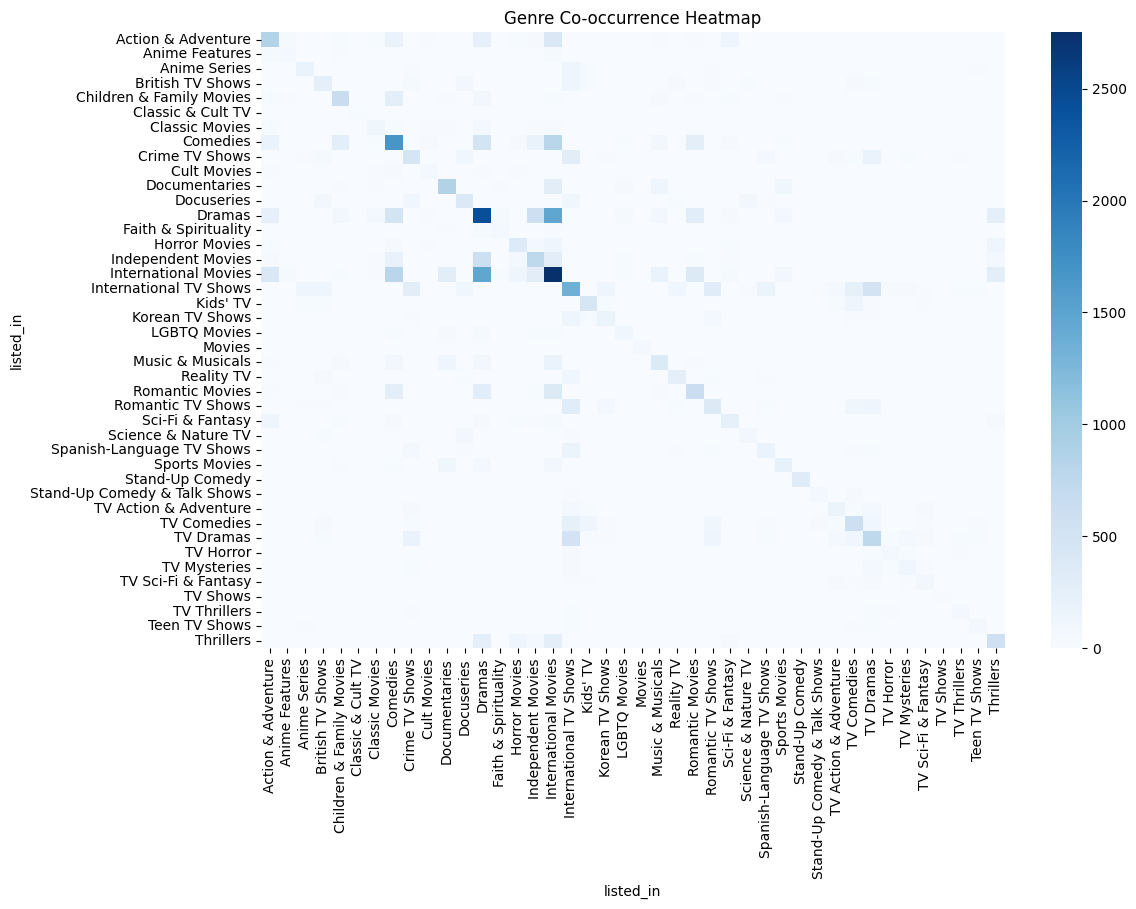

In [157]:
genre_matrix = df_exploded_genres.groupby(['title', 'listed_in']).size().unstack(fill_value=0)
cooccurrence_matrix = genre_matrix.T.dot(genre_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(cooccurrence_matrix, cmap='Blues', annot=False)
plt.title('Genre Co-occurrence Heatmap')
plt.show()


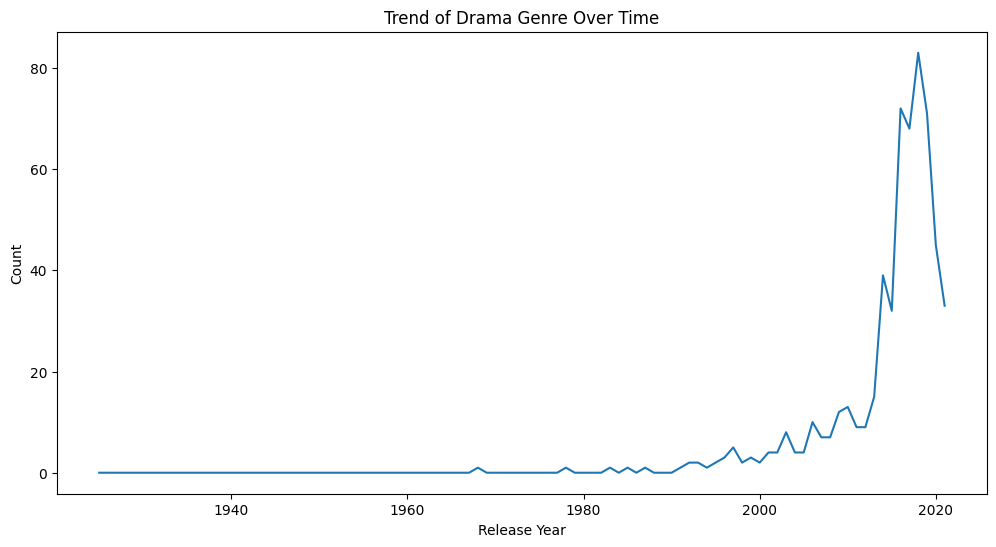

In [158]:
df_exploded_genres['release_year'] = df['release_year']

genre_trend = df_exploded_genres.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

genre_trend['Thrillers'].plot(kind='line', figsize=(12, 6), title='Trend of Drama Genre Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

### Observations

#### Popularity of Genres:
- **International Movies** and **Dramas** dominate Netflix’s library, reflecting the platform’s global audience and preference for storytelling.

#### Frequent Genre Pairs:
- Genres such as **Comedies** and **Romantic Movies** often co-occur, indicating thematic overlaps that appeal to specific viewer preferences.

#### Diverse Content:
- The wide range of genres highlights Netflix’s efforts to cater to audiences with varied tastes, from action enthusiasts to documentary lovers.

### Insights

1. **Global Appeal**: The popularity of **International Movies** and **TV Shows** underscores Netflix's focus on expanding its global audience.
2. **Cross-Genre Content**: Frequent genre combinations suggest Netflix invests in hybrid content to attract a wider range of viewers.
3. **Future Exploration**: Analyzing the evolution of genre popularity over time could reveal shifts in viewer preferences and strategic changes.
